Kita akan membuat dataset dengan 3 pola (linear, circular, dan sinusoidal).

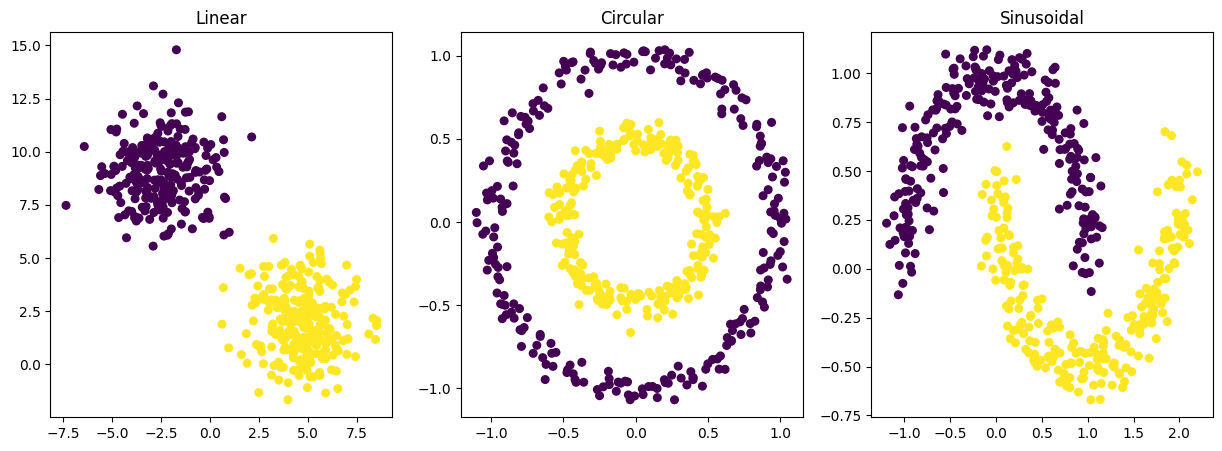

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

# Linear pattern
X_linear, y_linear = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=1.5)

# Circular pattern
X_circular, y_circular = make_circles(n_samples=500, noise=0.05, factor=0.5)

# Sinusoidal pattern
X_sinusoidal, y_sinusoidal = make_moons(n_samples=500, noise=0.1)

# Plot the datasets
datasets = [(X_linear, y_linear), (X_circular, y_circular), (X_sinusoidal, y_sinusoidal)]
titles = ['Linear', 'Circular', 'Sinusoidal']

plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
    plt.title(titles[i])
plt.show()


Lakukan pembagian dataset menjadi training dan testing set.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to split and scale datasets
def preprocess_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

# Preprocess each dataset
preprocessed_data = [preprocess_data(X, y) for X, y in datasets]


Buat model SVM, Decision Tree, XGBoost, dan Random Forest. Evaluasi kinerja dengan metrik seperti accuracy.

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Function to train and evaluate models
def train_ml_models(X_train, X_test, y_train, y_test):
    models = {
        "SVM": SVC(kernel='rbf', random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    return results

# Train and evaluate each dataset
ml_results = [train_ml_models(*data) for data in preprocessed_data]


c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder"

Buat model Neural Network menggunakan PyTorch.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define a simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.fc(x)

# Function to train Neural Network
def train_nn(X_train, X_test, y_train, y_test):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    X_train, X_test = torch.FloatTensor(X_train).to(device), torch.FloatTensor(X_test).to(device)
    y_train, y_test = torch.LongTensor(y_train).to(device), torch.LongTensor(y_test).to(device)

    train_data = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

    model = SimpleNN(X_train.shape[1]).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training loop
    for epoch in range(50):  # 50 epochs
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluate
    model.eval()
    with torch.no_grad():
        y_pred = torch.argmax(model(X_test), dim=1)
        accuracy = accuracy_score(y_test.cpu(), y_pred.cpu())
    return accuracy

# Train and evaluate NN for each dataset
nn_results = [train_nn(*data) for data in preprocessed_data]


Gabungkan hasil evaluasi dari model ML dan NN.

In [9]:
import pandas as pd

# Combine ML and NN results
comparison_results = []
for i, title in enumerate(titles):
    result = {**ml_results[i], "Neural Network": nn_results[i]}
    result["Pattern"] = title
    comparison_results.append(result)

# Convert to DataFrame
df_results = pd.DataFrame(comparison_results)

# Save the results to a CSV file
df_results.to_csv("model_comparison_results.csv", index=False)

# Display results
df_results


,SVM,Decision Tree,Random Forest,XGBoost,Neural Network,Pattern
0,1.000000,1.000000,1.000000,1.000000,1.0,Linear
1,1.000000,0.993333,1.000000,1.000000,1.0,Circular
2,0.986667,0.986667,0.986667,0.973333,1.0,Sinusoidal


Dataset dengan pola linear cenderung memiliki performa baik pada model ML seperti SVM.
Circular dan sinusoidal pola mungkin lebih sulit diprediksi untuk model ML tetapi NN dapat menyesuaikan dengan baik.
Neural Network memiliki potensi lebih baik untuk dataset non-linear dengan fitur kompleks.
Hasil lengkap disimpan ke dalam file comparison_results.csv untuk analisis lebih lanjut.